#DISTRIBUCION BINOMIAL
Supongamos que estamos modelando el número de clientes que realizan una compra en una tienda en línea en un día determinado. Sabemos que la tienda recibe en promedio 10 visitantes diarios y la probabilidad de que un visitante realice una compra es del 30%. Queremos generar variables aleatorias que representen el número de clientes que realizan una compra en un día, utilizando la distribución binomial y el método de la transformada inversa.

Facilitador: José Gabriel Rodríguez Rivas

Alumno: Carlos Simental Arrieta


Número de clientes que realizaron una compra en cada simulación (día):
[4, 3, 2, 3, 3, 2, 2, 5, 3, 1, 4, 3, 3, 4, 1, 5, 3, 3, 3, 4, 5, 3, 3, 3, 1, 3, 1, 4, 3, 4, 5, 3, 5, 5, 2, 3, 3, 1, 1, 4, 3, 2, 1, 5, 3, 4, 3, 1, 4, 3, 3, 6, 5, 4, 2, 3, 1, 4, 5, 4, 2, 2, 4, 1, 5, 2, 3, 2, 1, 4, 2, 2, 4, 2, 2, 4, 2, 5, 0, 3, 3, 3, 4, 3, 4, 2, 2, 1, 2, 4, 2, 1, 2, 3, 5, 2, 4, 2, 5, 3]


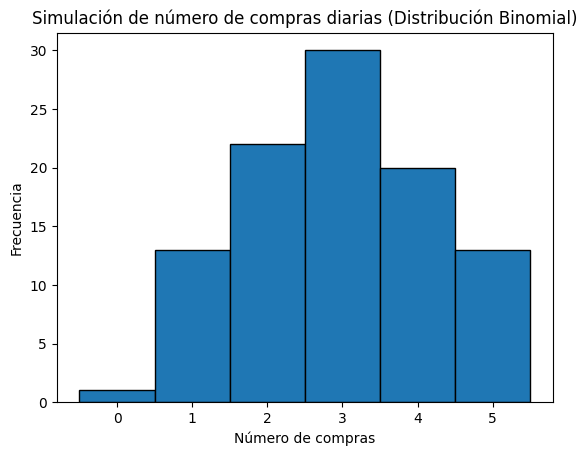

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial
n = 10   # Número de visitantes diarios
p = 0.30 # Probabilidad de que un visitante realice una compra

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (días)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de distribución acumulada de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de clientes que hicieron una compra
        k += 1

# Generar la cantidad de clientes que realizaron una compra en cada simulación (día)
compras_simuladas = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de clientes que realizaron una compra en cada simulación (día):")
print(compras_simuladas)

# Graficar los resultados
plt.hist(compras_simuladas, bins=np.arange(min(compras_simuladas), max(compras_simuladas) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de número de compras diarias (Distribución Binomial)")
plt.xlabel("Número de compras")
plt.ylabel("Frecuencia")
plt.show()